<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/PyTorch_MNIST_and_digits_recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

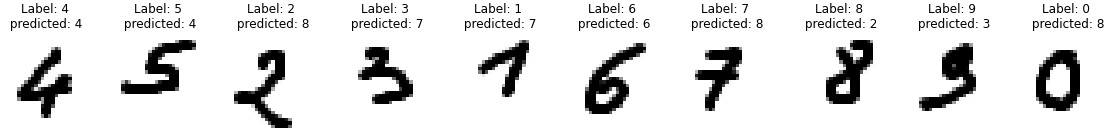

#Libraries

In [157]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import imageio
import os
import cv2

#Importing the data

##Transforming the data into tensors using the transforms module

In [ ]:
BATCH_SIZE = 32

#Transformations
transform = transforms.Compose([transforms.ToTensor()])

#Download and load training dataset
trainset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Projekty Machine Learning/PyTorch/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

#Testing dataset
testset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Projekty Machine Learning/PyTorch/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

##Display the data

In [ ]:
for data in trainloader:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data[0][0], data[1][0]

print(y)

tensor(3)


In [ ]:
x.shape

torch.Size([1, 28, 28])

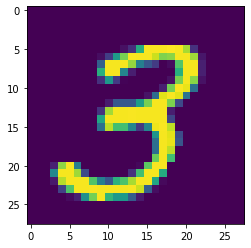

In [ ]:
plt.imshow(data[0][0].view(28, 28))
plt.show()

##Function to display the image

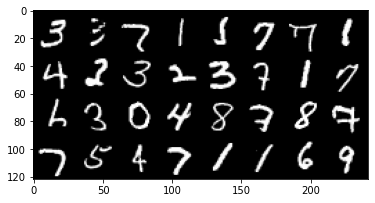

In [ ]:
def display_img(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

#Iterate through the trainset
dataiter = iter(trainloader)
images, labels = next(dataiter)

#Display the image
display_img(torchvision.utils.make_grid(images))

##Checking the train dataset balance

In [ ]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainloader:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for key in counter_dict:
  print(f'Ratio of {key} equals {round(counter_dict[key]/total*100, 2)}')

Ratio of 0 equals 9.87
Ratio of 1 equals 11.24
Ratio of 2 equals 9.93
Ratio of 3 equals 10.22
Ratio of 4 equals 9.74
Ratio of 5 equals 9.04
Ratio of 6 equals 9.86
Ratio of 7 equals 10.44
Ratio of 8 equals 9.75
Ratio of 9 equals 9.92


#Neural networks

##Network class

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64) #Fully connected, input = 28*28 px, ouput = 64 neurons in a hidden layer
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10) #output = 10 classes

  #Feed-forward
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    #Log softmax used for multiclass classification 
    return F.log_softmax(x, dim = 1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


##Creating sample data

In [ ]:
X = torch.rand((28, 28))
# X = X.view(28*28)

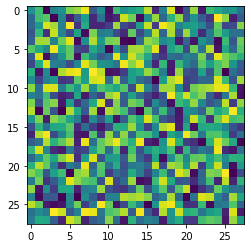

In [ ]:
plt.imshow(X.view(28, 28))
plt.show()

##Feed through the NN

In [ ]:
output = net(X.view(-1, 28*28))
output

tensor([[-2.1814, -2.3470, -2.2323, -2.2877, -2.2659, -2.3074, -2.3174, -2.3444,
         -2.4618, -2.3056]], grad_fn=<LogSoftmaxBackward0>)

##Optimizer

tensor(1)


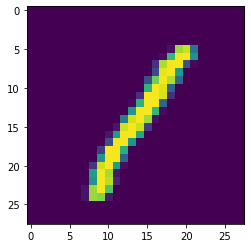

tensor(5)


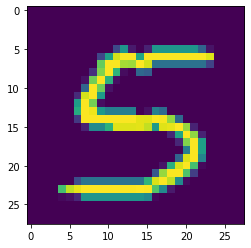

In [ ]:
optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 2

for epoch in range(EPOCHS):
  #data is a batch of featuresets and labels
  for data in trainloader:
    X, y = data
    # print(X[0])
    print(y[0])
    plt.imshow(X[0].view(28, 28))
    plt.show()
    break

##Loss calculation

In [ ]:
optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  #data is a batch of featuresets and labels
  for data in trainloader:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward() #backpropagation of the loss
    optimizer.step()
  print(loss)

tensor(0.3208, grad_fn=<NllLossBackward0>)
tensor(0.1664, grad_fn=<NllLossBackward0>)
tensor(0.0215, grad_fn=<NllLossBackward0>)


##Checking how good the NN is at the moment

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainloader:
    X, y = data
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1
print('Accuracy: ', round(correct/total, 2))

Accuracy:  0.98


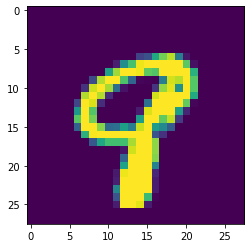

Label: tensor(9)
Prediction: tensor(9)


In [ ]:
plt.imshow(X[0].view(28,28))
plt.show()
print('Label:', y[0])
print('Prediction:', torch.argmax(net(X[0].view(-1, 28*28))))

##Checking with the digits written in Paint

In [ ]:
path = '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/'
filenames = os.listdir(path)
pictures = []

for filename in filenames:
  filename = path+filename
  pictures.append(filename)

pictures

['/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/4.png',
 '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/5.png',
 '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/2.png',
 '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/3.png',
 '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/1.png',
 '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/6.png',
 '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/7.png',
 '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/8.png',
 '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/9.png',
 '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/0.png']

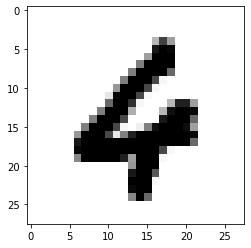

In [ ]:
im = imageio.imread(pictures[0])
plt.imshow(im)
plt.show()

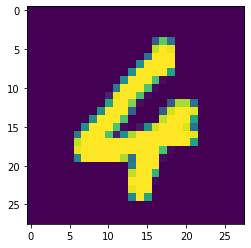

In [ ]:
im = imageio.imread(pictures[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = cv2.bitwise_not(im)
plt.imshow(im)
plt.show()

##Convert numpy array to tensor

In [ ]:
t = torch.from_numpy(im)
t = t.to(torch.float32)

In [ ]:
output = net(t.view(-1, 28*28))
output

tensor([[ -543.2499, -3485.2935,  -800.0312, -2719.2178,     0.0000, -2898.6304,
          -336.5413, -2115.5344, -2493.5483, -1967.1587]],
       grad_fn=<LogSoftmaxBackward0>)

##Check all the digits

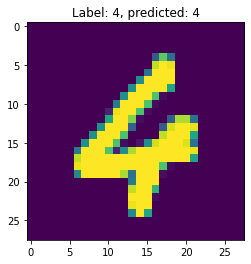

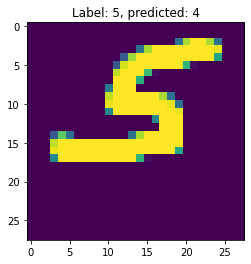

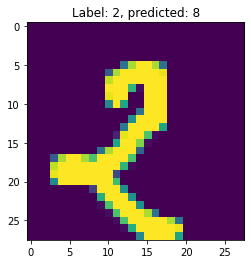

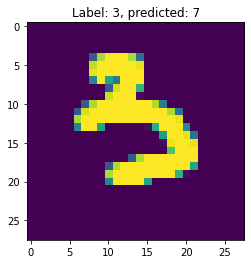

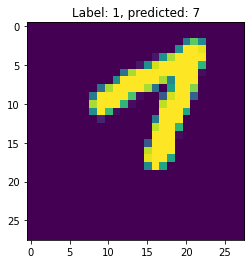

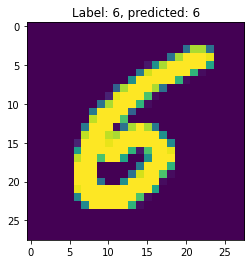

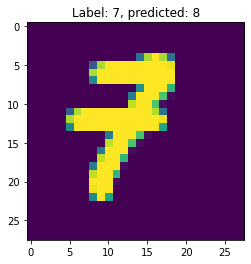

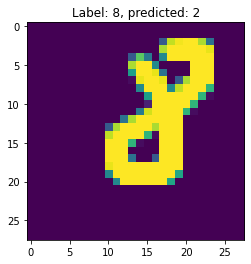

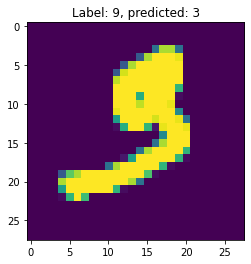

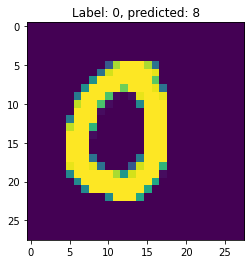

In [ ]:
path = '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/'
filenames = os.listdir(path)
pictures = []
correct = 0
total = 0

for filename in filenames:
  filename = path+filename
  pictures.append(filename)

for picture in pictures:
  label = int(picture[-5])
  im = imageio.imread(picture)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  im = cv2.bitwise_not(im)
  t = torch.from_numpy(im)
  t = t.to(torch.float32)
  output = net(t.view(-1, 28*28))
  for idx, i in enumerate(output):
    if torch.argmax(i) == label:
      correct += 1
    total += 1
  plt.imshow(im)
  plt.title(f'Label: {label}, predicted: {torch.argmax(i)}', loc = 'center')
  plt.show()

In [ ]:
correct, total

(2, 10)

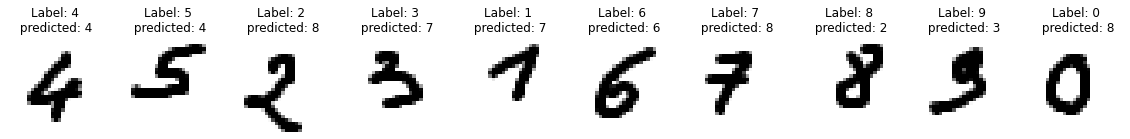

In [176]:
path = '/content/drive/MyDrive/Projekty Machine Learning/PyTorch/Cyfry/'
filenames = os.listdir(path)
pictures = []
labels = []
predicted = []
correct = 0
total = 0

for filename in filenames:
  filename = path+filename
  pictures.append(filename)

for idx, picture in enumerate(pictures):
  label = int(picture[-5])
  labels.append(label)
  im = imageio.imread(picture)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  im = cv2.bitwise_not(im)
  t = torch.from_numpy(im)
  t = t.to(torch.float32)
  output = net(t.view(-1, 28*28))
  predicted.append(torch.argmax(output))
  for idx, i in enumerate(output):
    if torch.argmax(i) == label:
      correct += 1
    total += 1

def showImagesHorizontally(list_of_files, labels, predicted):
    fig = figure(figsize=(20,20))
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        a.title.set_text(f'Label: {labels[i]}\n predicted: {predicted[i]}')
        image = imread(list_of_files[i])
        imshow(image,cmap='Greys_r')
        axis('off')

showImagesHorizontally(pictures, labels, predicted)